***
# **<center>COURS PYTHON 2IMACS #10</center>**
# ***<center>Traitement d'images</center>***
# ***<center>Open CV</center>***
# ***<center>Scikit Image</center>***
***

Plusieurs bibliothèques Python sont disponibles pour réaliser des traitements d'images. Nous allons notamment voir comment appliquer differents filtres , seuiller des images, détecter et mesurer des objets présents dans des images.

# 10-1 Bibliothèque OpenCV

OpenCV pour Open Computer Vision est développées en C++, Python et Java, elle permet les opérations de base de traitement d'image (lecture ecriture, sauvegarde, calcul d'histogrammes, seuillages...).
Elle permet également de travailler sur des vidéos.

## 10-1-1 Ouverture et Format

### 10-1-1-1 Ouverture du fichier image et affichage

OpenCv peut ouvrir la plupart des format d'images courant(jpg, png, tif, bpm...). Aprés l'importation de la bibliothèque, affectons les données contenues dans le fichier tournesols.jpg à img

In [27]:
import cv2
img = cv2.imread("fichiers_cours/tournesols.jpg")

Affichons l'image img et donnons lui un titre.   
**Attention:** avec k = cv2.waitKey(0) on précise qu'on attend une action pour fermer l'image, il est conseillé de la fermer avec la x en haut à gauche. 

In [22]:
cv2.imshow("Le titre pour le bandeau de mon image",img)
k = cv2.waitKey(0)

### 10-1-1-2 Structure de l'image

img est maintenant un tableau numpy

In [3]:
print(type(img))

<class 'numpy.ndarray'>


Visualisons ses dimensions:

In [4]:
import numpy as np
print('dimensions : ',img.shape)
# Trouver les valeurs minimale et maximale avec numpy
min_val = np.min(img)
max_val = np.max(img)
print('valeur mini pixel : ',min_val,'valeur maxi pixel : ', max_val)

dimensions :  (600, 800, 3)
valeur mini pixel :  0 valeur maxi pixel :  255


On a bien une image couleur en 3 canaux de dimension 800x600

Affichons son Histogramme avec cv2.calcHist

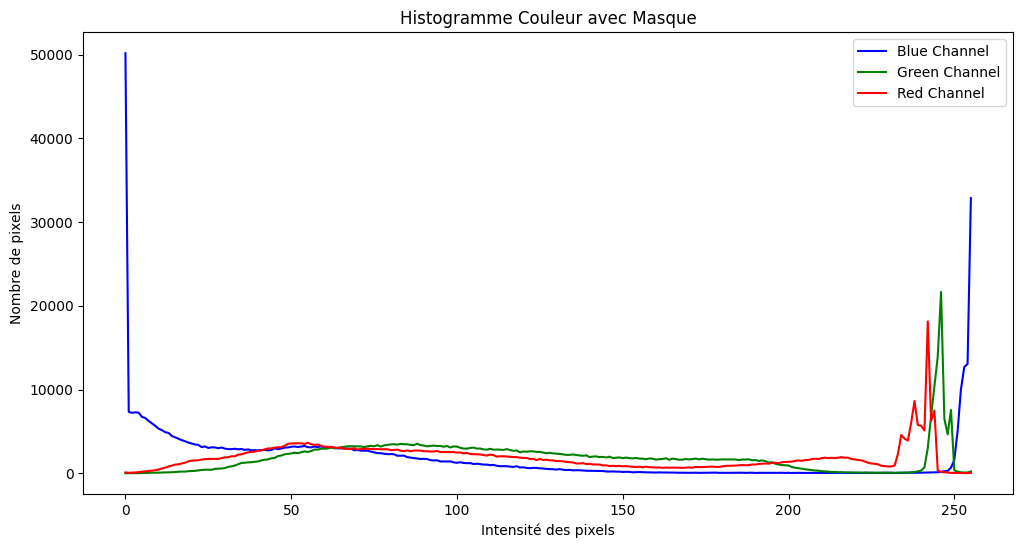

In [30]:

# Décomposer les canaux de couleur
blue_channel = img[:, :, 0]
green_channel = img[:, :, 1]
red_channel = img[:, :, 2]

# Définir un masque (peut être None si vous ne voulez pas utiliser de masque)
mask = None

# Définir le nombre de bins (256 pour chaque canal)
bins = [256]

# Définir la plage des valeurs de pixel (0 à 256 pour chaque canal)
pixel_range = [0, 256]

# Calculer l'histogramme pour chaque canal de couleur avec un masque
hist_blue = cv2.calcHist([blue_channel], [0], mask, bins, pixel_range)
hist_green = cv2.calcHist([green_channel], [0], mask, bins, pixel_range)
hist_red = cv2.calcHist([red_channel], [0], mask, bins, pixel_range)

# Afficher les histogrammes
plt.figure(figsize=(12, 6))
plt.plot(hist_blue, color='blue', label='Blue Channel')
plt.plot(hist_green, color='green', label='Green Channel')
plt.plot(hist_red, color='red', label='Red Channel')
plt.title('Histogramme Couleur avec Masque')
plt.xlabel('Intensité des pixels')
plt.ylabel('Nombre de pixels')
plt.legend()
plt.show()


### 10-1-1-3 Conversion en niveau de gris

L'image peut être convertie en niveaux de gris avec cvtColor

In [33]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2.imshow("Niveaux de gris",img_gray )
k = cv2.waitKey(0)

In [34]:
print('dimensions : ',img_gray.shape)
# Trouver les valeurs minimale et maximale avec numpy
min_val = np.min(img_gray)
max_val = np.max(img_gray)
print('valeur mini pixel : ',min_val,'valeur maxi pixel : ', max_val)

dimensions :  (600, 800)
valeur mini pixel :  2 valeur maxi pixel :  255


### 10-1-1-4 Sauvegarde

Il est possible de sauvegarder l'image après modification:

In [35]:
cv2.imwrite('fichiers_cours/fichiers_crees/nouvelle_image.jpg', img_gray)

True

## 10-1-2 Coordonnées et figures géométriques

On peut ajouter des figures géométriques sur l'image en précisant les coordonnées, les propriétés du trait...

### 10-1-2-1 Ligne

In [7]:
# Définir les points de début et de fin de la ligne
start_point = (650, 200)
end_point = (550, 50)

# Définir la couleur de la ligne en format BGR (bleu, vert, rouge)
color = (0, 0, 255)  # Rouge

# Définir l'épaisseur de la ligne
thickness = 3

# Utiliser la fonction line pour dessiner la ligne
img_draw = cv2.line(img, start_point, end_point, color, thickness)

# Afficher l'image avec la ligne dessinée
cv2.imshow("Ligne Rouge", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 10-1-2-2 Cercle

Un cercle, à partir des coordonnées de son centre et de son rayon

In [36]:
# Dessiner un cercle rouge
center_coordinates = (100, 100)
radius = 50
color = (0, 0, 255)  # Rouge en format BGR
thickness = 3

# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Si on veut une figure pleine, on met le thickness à -1

In [37]:
# # Dessiner un cercle rouge
# center_coordinates = (100, 100)
# radius = 50
# color = (0, 0, 255)  # Rouge en format BGR
thickness = -1

# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

### 10-1-2-3 Rectangle

Rectangle à partir de 2 points

In [10]:
# Dessiner un rectangle vert
start_point = (350, 250)
end_point = (500, 550)
color = (0, 255, 0)  # Vert en format BGR
thickness = 3

# Utiliser la fonction rectangle pour dessiner le rectangle
img_draw = cv2.rectangle(img, start_point, end_point, color,thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Visualisons les points start point et end point

In [11]:
color = (0, 0, 255)
radius = 8
thickness =-1

img_draw = cv2.circle(img_draw, start_point, radius, color, thickness)
img_draw = cv2.circle(img_draw, end_point, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

### 10-1-2-4 Polygone 

Polygone à partir des coordonnées de ses sommets

In [38]:
import numpy as np
# Définir les angles d'un pentagone
# pentagon_points = np.array([
#     [200, 300],  # Point 1
#     [300, 200],  # Point 2
#     [400, 200],  # Point 3
#     [500, 300],  # Point 4
#     [350, 400],  # Point 5
# ], np.int32)


pentagon_points = np.array([
    [0, 300],  # Point 1
    [100, 200],  # Point 2
    [200, 200],  # Point 3
    [300, 300],  # Point 4
    [150, 400],  # Point 5
], np.int32)





# Reshape pour s'assurer que l'array est dans le bon format
pentagon_points = pentagon_points.reshape((-1, 1, 2)) # A PRECISER
# Dessiner le pentagone (rouge) sur l'image
color = (250, 50, 50)  # Couleur en format BGR
thickness = 3

# Utiliser la fonction polylines pour dessiner le pentagone
img_pentagon = cv2.polylines(img, [pentagon_points], isClosed=True, color=color, thickness=thickness)


cv2.imshow("Figures",img_pentagon)
k = cv2.waitKey(0)

## 10-1-3 Filtres et seuillages

Le seuillage en traitement d'image est essentiel pour simplifier et segmenter les images en distinguant les objets d'intérêt du fond, facilitant ainsi l'analyse et la détection.
La fonction threshold ne peut être appliqué qu'à une image en niveaux de gris, commençons par une conversion:

In [40]:
img = cv2.imread("fichiers_cours/formes.png")
cv2.imshow("Formes",img)
k = cv2.waitKey(0)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2.imshow("Formes",img_gray)
k = cv2.waitKey(0)

#### 10-1-3-1 Seuillage Binaire

Appliquons maintenant un seuillage binaire à l'image, en choisissant un niveau gris au dessous duquel on mettra la valeur des pixels à zero (noir), c'est le seuil,  et un niveau de fond, c'est la valeur qu'on donnera à tous pixels au dessus du seuil (généralement 255 blanc).

In [41]:
seuil = 220
fond = 255

ret1,threshold=cv2.threshold(img_gray,seuil,fond,cv2.THRESH_BINARY) 
print('reth1 = ',ret1)

cv2.imshow("Formes",threshold)
k = cv2.waitKey(0)

reth1 =  220.0


En jouant sur fond, on peut afficher un fond gris

In [42]:
seuil = 220
fond = 100

ret1,threshold=cv2.threshold(img_gray,seuil,fond,cv2.THRESH_BINARY) 
print('reth1 = ',ret1)

cv2.imshow("Formes",threshold)
k = cv2.waitKey(0)

reth1 =  220.0


Sur notre figure, testons differents niveaux de seuil, attention, ici pour des question d'affichage, nous utiliserons un THRESH_BINARY_INV qui mettra le fond à zero et les objets à 255 :

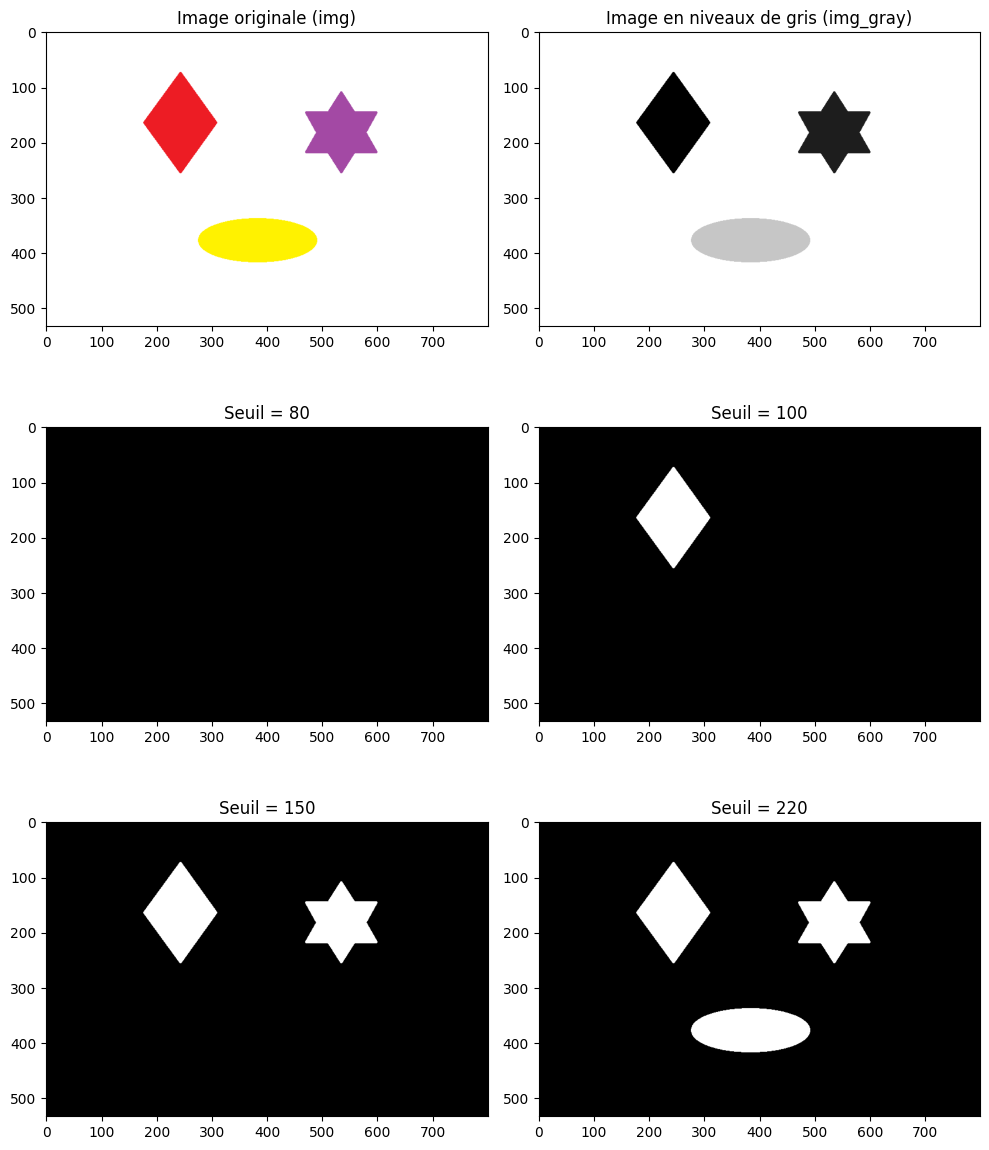

In [44]:
from matplotlib import pyplot as plt

seuils = [80,100,150,220]
# Créer une grille de sous-graphiques (3 lignes, 2 colonnes)
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Afficher l'image originale (img)
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image originale (img)')

# Afficher l'image en niveaux de gris (img_gray)
axes[0, 1].imshow(img_gray, cmap='gray')
axes[0, 1].set_title('Image en niveaux de gris (img_gray)')

# Boucle sur les seuils et afficher les images seuillées
for i, s in enumerate(seuils,start=1): # start = 1 car on a deja des subplots en 0 et 1
    ret1, threshold = cv2.threshold(img_gray, s, 255, cv2.THRESH_BINARY_INV)
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(threshold, cmap='gray')
    axes[row, col].set_title(f'Seuil = {s}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


On a donc des niveaux de gris differents pour les 3 formes geometriques. On pourrait aussi pu choisir d'utiliser 2 valeurs de seuil pour selectionner une gamme de niveaux de gris avec cv2.IMREAD_GRAYSCALE.  
Attention, la fonction cv2.inRange assigne la valeur maximale (généralement 255 pour une image en niveaux de gris) aux pixels qui se situent entre les seuils spécifiés, et 0 aux autres pixels

#### 10-1-3-2 Seuillage de Masque

On peut également creer un masque pour selectionner une plage de valeurs de pixels

In [45]:

# Définir les seuils haut et bas
seuil_bas = 200
seuil_haut = 250

# Appliquer le seuillage
mask = cv2.inRange(img_gray, seuil_bas, seuil_haut)

# Inverser le masque avec cv2.bitwise_not
inverse_mask = cv2.bitwise_not(mask)

# Afficher le résultat du seuillage
cv2.imshow('Seuillage', inverse_mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 10-1-3-3 Seuillage Adaptatif

Les seuils adaptatifs permettent d'aptater le seuil en fonction de la zone de l'image, en fonction des pixels voisins. Ceci permet de travailler sur des images avec des eclairages irréguliers.

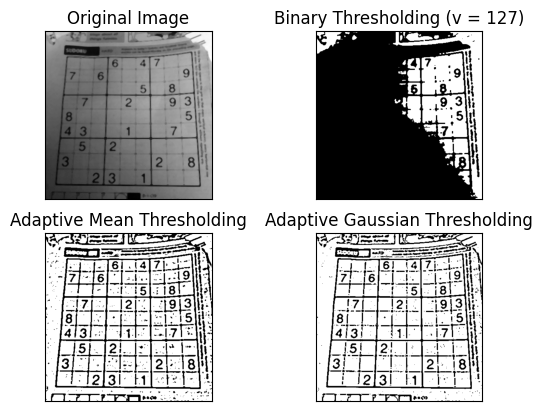

In [46]:
import cv2 as cv
img = cv.imread('fichiers_cours/sudoku.png', cv.IMREAD_GRAYSCALE)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Binary Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

D'autres types de seuillages sont disponibles dans la [doc OpenCV](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)

#### 10-1-3-4 Seuillage sur des couleurs

L'espace des couleurs HSV (Hue, Saturation, Luminance) est un modèle de représentation des couleurs qui sépare les informations de teinte, de saturation et de luminance d'une couleur. Il est souvent utilisé dans le domaine du traitement d'images et de la vision par ordinateur pour faciliter la manipulation et la détection des couleurs. 

- Teinte (H - Hue) :
La teinte représente la couleur elle-même. Elle est mesurée en degrés sur le cercle chromatique, où chaque degré correspond à une couleur spécifique.
La plage de valeurs de la teinte dans l'espace HSV est généralement de 0 à 360 degrés, mais dans OpenCV, elle est souvent normalisée à une plage de 0 à 179 pour tenir compte des limitations de stockage.

- Saturation (S - Saturation) :
La saturation mesure l'intensité de la couleur. Une saturation élevée signifie des couleurs vives et éclatantes, tandis qu'une saturation faible conduit à des couleurs plus ternes et proches du gris.
La plage de valeurs de la saturation dans l'espace HSV est de 0 à 255 dans OpenCV.

- Luminance (V - Value) ou Brillance (B - Brightness) :
La luminance représente la luminosité ou la brillance de la couleur. Une luminance élevée signifie une couleur plus claire, tandis qu'une luminance faible donne une couleur plus sombre.
La plage de valeurs de la luminance dans l'espace HSV est de 0 à 255 dans OpenCV.

On peut visualiser cette representation de la manière suivante:  

![hsv](fichiers_cours/hsv1.jpg)

Pour trouver les valeurs, on peut s'aider d'une carte de couleur ou d'un [calculateur de couleurs](https://www.selecolor.com/en/hsv-color-picker/) Attention H est limité à 180° sur OpenCv.

Appliquons cette detection à nos tournesols

In [47]:
# Charger l'image
img = cv2.imread('fichiers_cours/tournesols.jpg')  # Remplacez 'votre_image.jpg' par le chemin de votre image

# Convertir l'image BGR en image HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Définir les plages de couleur pour le jaune dans l'espace HSV (on peut s'aider de
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Créer un masque en utilisant les plages spécifiées
mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)


# Afficher l'image originale et le résultat
cv2.imshow('Image originale', img)
cv2.imshow('Résultat de la détection de couleur', mask)

cv2.waitKey(0)
cv2.destroyAllWindows()


## 10-1-4 Détection de contours

#### 10-1-4-1 Filtre de Canny

Pour detecter les contours d'un objet, On peut appliquer des filtres comme un filtre de Canny, c'est un algorithme détecte les contours en trouvant les changements rapides d'intensité dans une image. Il inclut plusieurs étapes, y compris la réduction du bruit, la recherche de gradients, et la suppression des pixels non-maxima.

https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

In [49]:
img = cv2.imread("fichiers_cours/smarties.png")

seuil_bas = 500 #seuils en gradient
seuil_haut = 550
img_blur = cv2.blur(img_gray,(3,3))
edges = cv2.Canny(img, seuil_haut, 150) # on peut jouer sur les seuils bas et seuils hauts

cv2.imshow("Origine",img)
cv2.imshow("Canny",edges)
k = cv2.waitKey(0)

#### 10-1-4-2 Transformée de Hough

La tranformée de Hough permet de reconnaitre des formes comme des cercles ou des lignes

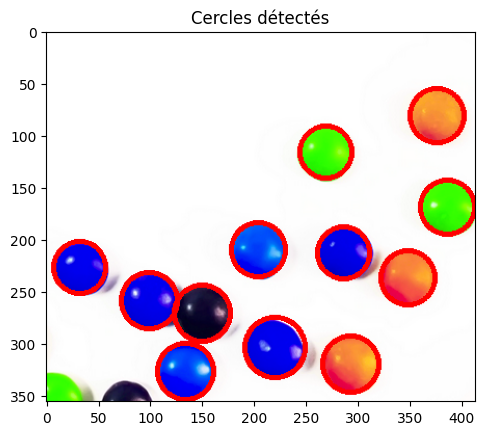

In [50]:
# Paramètres pour la transformée de Hough
resolution_accumulator = 1
min_distance_between_circles = 10
threshold_canny = 100
threshold_accumulator = 30
min_radius = 1
max_radius = 30

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Appliquer la transformée de Hough pour détecter les cercles
circles = cv2.HoughCircles(
    img_gray,
    cv2.HOUGH_GRADIENT,
    dp=resolution_accumulator,
    minDist=min_distance_between_circles,
    param1=threshold_canny,
    param2=threshold_accumulator,
    minRadius=min_radius,
    maxRadius=max_radius
)

# # Convertir les coordonnées en entiers
# circles = np.uint16(np.around(circles))
# Convertir les coordonnées en entiers
circles = circles.astype(np.uint16)

# Dessiner les cercles détectés sur l'image
for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 3)

# Afficher l'image avec les cercles détectés
plt.imshow(img, cmap='gray')
plt.title('Cercles détectés')
plt.show()

circles renvoit un tableau numpy de la forme  [[[x1, y1, r1], [x2, y2, r2], ..., [xn, yn, rn]]] avec x ey y coordonnées du centre et r rayon.

On peut jouer sur les paramètres:  

resolution_accumulator :  Représente la résolution de l'accumulateur en pixels. Une valeur de 1 signifie que l'accumulateur a la même résolution que l'image d'entrée. Une résolution plus élevée peut accélérer le processus de détection, mais elle peut également être moins précise.

param1 : Seuil pour le détecteur de gradient. Il s'agit du seuil supérieur utilisé par le détecteur de contours de Canny, qui est intégré dans le processus de détection de cercles.  
Une valeur plus élevée de param1 signifie que seuls les contours plus forts sont considérés comme des candidats pour la détection de cercles.  


param2 : Seuil pour  l'accumulateur de Hough.Une valeur plus petite de param2 signifie que moins de candidats potentiels (cercles) seront considérés comme valides. Cela aide à éliminer les cercles faux.



Detection de lignes avec tranformée de Hough

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('fichiers_cours/sudoku.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Appliquer un flou pour réduire le bruit et faciliter la détection des contours
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Détection des contours avec Canny
edges = cv2.Canny(blurred, 50, 200, None, 3)

# Appliquer la transformée de Hough pour détecter les lignes
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

# Dessiner les lignes détectées sur l'image originale

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)



cv2.imshow("Lignes",img)
k = cv2.waitKey(0)



#### 10-1-4-3 Contours

La fonction findContours est utilisée pour trouver et extraire les contours dans une image La fonction findContours prend en entrée une image binaire (par exemple, résultat d'un seuillage) et retourne une liste de contours.  
Contrairement à un filtre de canny qui retournera une image, la fonction findcontours retournera une liste de coordonnées de points définissant les contours. Ceci sera très utile pour extraire des mesures de dimension par exemple.

Il faut commencer par seuiller l'image

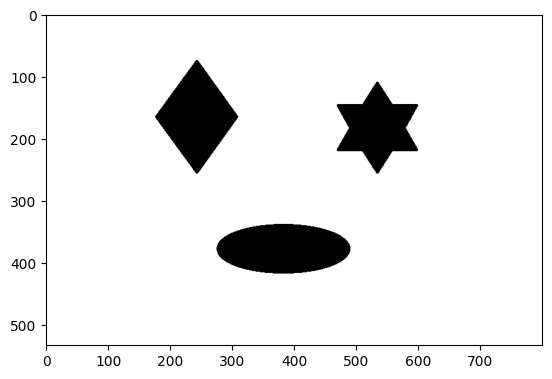

250.0


In [52]:
img = cv2.imread("fichiers_cours/formes.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret1,threshold=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)  
plt.imshow(threshold,cmap = 'gray')
plt.show()
print(ret1)

Puis on détècte les contours

In [53]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
print(len(contours),' contours trouves')
print('Le contour n°1 comporte', contours[1].shape[0],'points')
# print(contours[1])

4  contours trouves
Le contour n°1 comporte 192 points


In [55]:
print(hierarchy.shape)
print(hierarchy)


(1, 4, 4)
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]


- threshold: L'image seuillée à partir de laquelle les contours seront extraits.

- cv2.RETR_TREE: Le mode de récupération de contours. Il spécifie la manière dont les contours sont organisés dans la hiérarchie. cv2.RETR_TREE crée une structure de hiérarchie complète et reconstruit tous les contours.

- cv2.CHAIN_APPROX_SIMPLE: La méthode d'approximation des contours. Elle spécifie comment les contours doivent être stockés après l'approximation. cv2.CHAIN_APPROX_SIMPLE compresse les segments laisse seulement leurs points finaux.

La fonction reourne:

- contours: Un tuple contenant tous les contours trouvés dans l'image seuillée. Chaque contour est représenté sous forme de tableau numpy 2D contenant les coordonnées (x, y) des points constituant le contour.

- hierarchy: Une structure de données représentant la hiérarchie entre les contours. Elle est souvent utilisée pour identifier les contours internes et externes. Dans ce cas, elle n'est pas utilisée directement dans le code que vous avez fourni.

Le tableau hierarchy contient un tableau de 4 valeurs par contour.   
Ces 4 valeurs représentent:   
- Next: Index du contour suivant sur le même niveau hiérarchique.
- Previous: Index du contour précédent sur le même niveau hiérarchique.
- First_Child: Index du premier contour enfant.
- Parent: Index du contour parent.
      
Par exemple la premiere ligne [-1, -1, 1, -1] indique:
- Next (-1): Il n'y a pas de contour suivant sur le même niveau, donc la valeur est -1.
- Previous (-1): Il n'y a pas de contour précédent sur le même niveau, donc la valeur est -1.
- First_Child (1): Il a un contour enfant, et le premier contour enfant a l'index 1.
- Parent (-1): Il n'a pas de contour parent.
C'est le contours qui contient tous les autres.   
La ligne [ 4  2 -1  0] indique:
- Next (4): Il y a un contour suivant sur le même niveau, et son indice est 4.
- Previous (2): Il y a un contour précédent sur le même niveau, et son indice est 2.
- First_Child (-1): Il n'y a pas de contour enfant, donc la valeur est -1.
- Parent (0): Il a un contour parent, et son indice est 0.

Traçons les contours

4 contours detectes


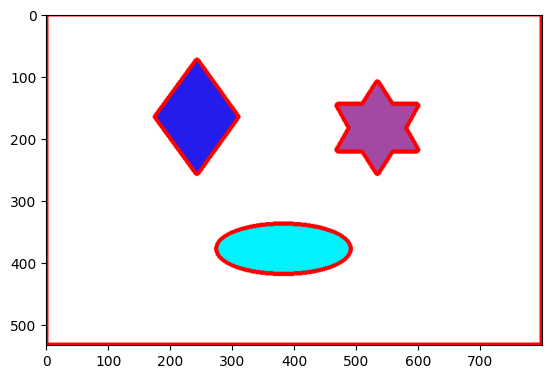

In [56]:

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)

print(len(contours),'contours detectes')

plt.imshow(img)
plt.show()

Ajoutons les numeros de chaque contour:

4 contours détectés


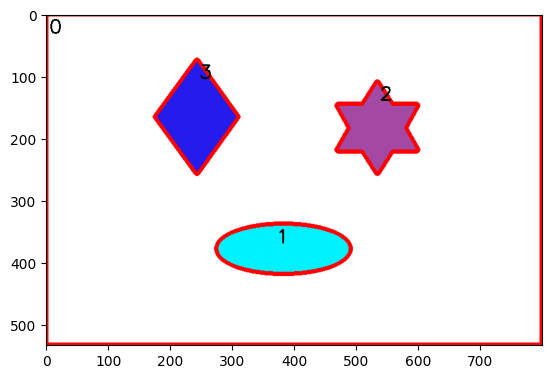

In [57]:
for i, cnt in enumerate(contours):
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)
    x, y = cnt[0][0]

    cv2.putText(img, str(i), (x+5,y+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2) # +5 et +30 pour que le zero soit dans l'image

print(len(contours), 'contours détectés')

plt.imshow(img)
plt.show()


Fome dans rectangle ou ellipse minimal

((399.5, 266.0), (532.0, 799.0), 90.0)
((382.5, 377.5), (217.0, 81.0), 0.0)
((534.0, 182.5), (130.36050415039062, 150.82623291015625), 60.2551155090332)
((242.96470642089844, 165.0257568359375), (149.81248474121094, 111.47516632080078), 53.88065719604492)


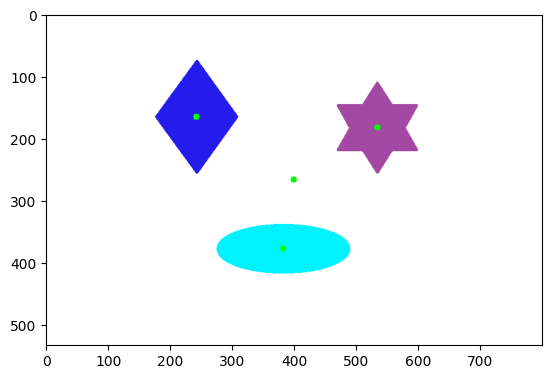

In [58]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    print(rect)
    coord0 = tuple(map(int,rect[0]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1) #point vert au centre de chaque rectangle


plt.imshow(img)
plt.show()

rect[0] : coordonnées du centre du rectangle.  
rect[1] : dimensions du rectangle (largeur, hauteur).  
rect[2] : l'angle de rotation du rectangle.

On peut convertir ces valeurs avec cv2.boxPoints():  
box = cv2.boxPoints(rect)  
Box contient les coordonnées des 4 angles du rectangle


Englobons les contours dans un rectangle orienté de taille minimale

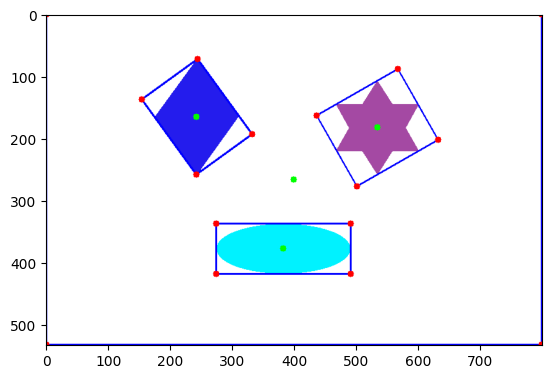

In [59]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge
    coord0 = tuple(map(int,rect[0]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1)

    # Point rouge à chaque coin du rectangle
    for i in range(len(box)):
        cv2.circle(img, tuple(box[i]), 5, (255, 0, 0), -1)


plt.imshow(img)
plt.show()

Calcul des ratios de convexité:

1.0
0.9900396272892792
0.7185562146131033
0.9873007295325588


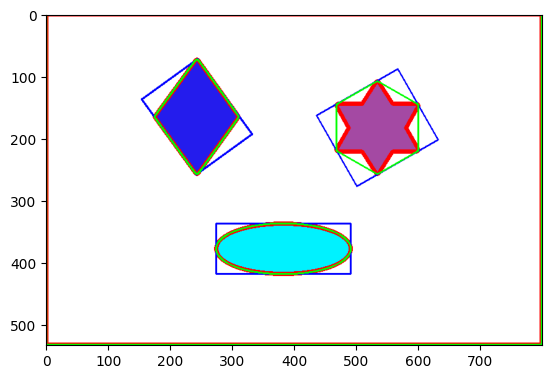

In [60]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge

    # Calculer le polygone convexe
    hull = cv2.convexHull(cnt)
    # Calculer la surface du polygone convexe et la surface du contour d'origine
    area_hull = cv2.contourArea(hull)
    area_contour = cv2.contourArea(cnt)
    ratio_convexite = area_contour / area_hull
    print(ratio_convexite)
                   
    # Dessiner le polygone convexe (vert)
    cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)


plt.imshow(img)
plt.show()

### 10-1-4-4 Préparation à la detection de contours: Filtres

Si on a un fond bruité, la détection devient compliquée, on peut avoir besoin d'appliqué des filtres à l'image, utilisons ici cv2.blur qui fera une moyenne des pixels par zone et apportera un flou à l'image. D'autre filtres peuvent être utilisés (GaussianBlur MedianBlur...)

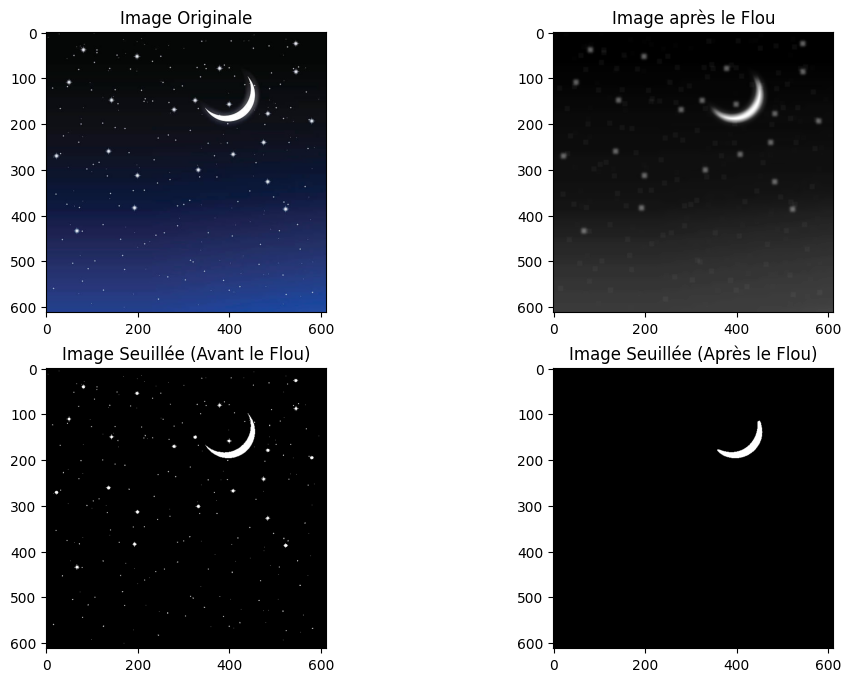

In [61]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fichiers_cours/moon.jpg")

# Convertir en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer le flou
img_blur = cv2.blur(img_gray, (11, 11))

# Appliquer le seuillage avant le flou
ret1, threshold1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)

# Appliquer le seuillage après le flou
ret2, threshold2 = cv2.threshold(img_blur, 140, 255, cv2.THRESH_BINARY)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher l'image après le flou
axes[0, 1].imshow(img_blur, cmap='gray')
axes[0, 1].set_title('Image après le Flou')

# Afficher l'image seuillée avant le flou
axes[1, 0].imshow(threshold1, cmap='gray')
axes[1, 0].set_title('Image Seuillée (Avant le Flou)')

# Afficher l'image seuillée après le flou
axes[1, 1].imshow(threshold2, cmap='gray')
axes[1, 1].set_title('Image Seuillée (Après le Flou)')

plt.show()



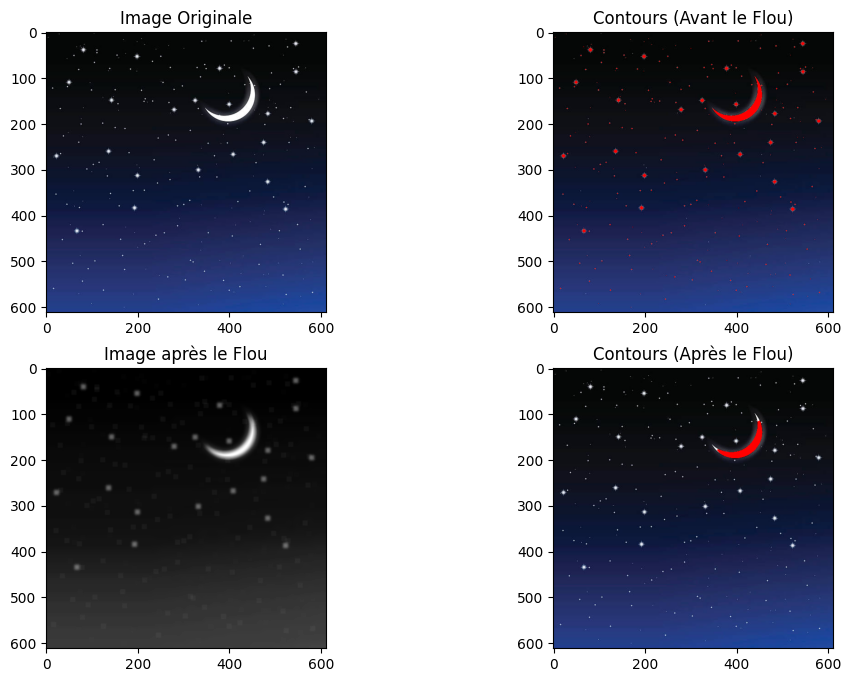

Nombre de contours (Avant le Flou): 247
Nombre de contours (Après le Flou): 1


In [62]:

img = cv2.imread("fichiers_cours/moon.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.blur(img_gray, (11, 11))

ret1, threshold1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)
contours1, hierarchy1 = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ret2, threshold2 = cv2.threshold(img_blur, 140, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(threshold2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher les contours avant le flou
img_contours1 = img.copy()
for cnt in contours1:
    cv2.drawContours(img_contours1, [cnt], -1, (0, 0, 255), -1)
axes[0, 1].imshow(cv2.cvtColor(img_contours1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Contours (Avant le Flou)')

# Afficher l'image après le flou
axes[1, 0].imshow(img_blur, cmap='gray')
axes[1, 0].set_title('Image après le Flou')

# Afficher les contours après le flou
img_contours2 = img.copy()
for cnt in contours2:
    cv2.drawContours(img_contours2, [cnt], -1, (0, 0, 255), -1)
axes[1, 1].imshow(cv2.cvtColor(img_contours2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Contours (Après le Flou)')

plt.show()

print("Nombre de contours (Avant le Flou):", len(contours1))
print("Nombre de contours (Après le Flou):", len(contours2))


## 10-1-5 Vidéo

OpenCV offre une multitude de fonctionnalités pour le traitement vidéo. Il peut capturer des flux vidéo en direct, lire et écrire des fichiers vidéo, détecter et suivre des objets en mouvement, extraire des images clés, appliquer des filtres, effectuer des analyses de mouvement, et bien plus encore. Ces capacités en font un outil puissant pour diverses applications de vision par ordinateur et de robotique.

CHANGER LA VIDEO

In [64]:
import cv2

# Chemin vers le fichier vidéo
video_path = "fichiers_cours/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la vidéo.")
    exit()

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Redimensionner le cadre en diminuant de moitié
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Afficher le cadre redimensionné
    cv2.imshow("Ma video redimensionnee", frame_resized)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()



Ajoutons un traitement , par exemple passons l'image en niveaux de gris

In [67]:
import cv2

# Chemin vers le fichier vidéo
video_path = "fichiers_cours/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la vidéo.")
    exit()

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Redimensionner le cadre en diminuant de moitié
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Convertir l'image en niveaux de gris
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Afficher le cadre redimensionné en niveaux de gris
    cv2.imshow("Ma video en niveaux de gris", frame_gray)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()


In [55]:
import cv2
import numpy as np

# Chemin vers le fichier vidéo
video_path = "fichiers_cours/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la vidéo.")
    exit()

# Créer une nouvelle fenêtre pour afficher les voitures rouges
cv2.namedWindow("Voitures Rouges", cv2.WINDOW_NORMAL)

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Redimensionner le cadre en diminuant de moitié
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Convertir l'image en niveaux de gris
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Convertir l'image en HSV
    hsv_frame = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2HSV)

    # Plage de valeurs HSV pour le rouge
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])

    # Créer un masque pour les pixels rouges
    red_mask = cv2.inRange(hsv_frame, lower_red, upper_red)

    # Appliquer le masque à l'image originale
    red_cars = cv2.bitwise_and(frame_resized, frame_resized, mask=red_mask)

    # Afficher l'image avec les voitures rouges
    cv2.imshow("Voitures Rouges", red_cars)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()


On a maintenant accés aux outils vus pour les images.

In [ ]:
Detection de visage

In [ ]:
# Detection de visages
import cv2

# Enable camera
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 420)

# import cascade file for facial recognition
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


# if you want to detect any object for example eyes, use one more layer of classifier as below:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")


while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Getting corners around the face
    faces = faceCascade.detectMultiScale(imgGray, 1.3, 5)  # 1.3 = scale factor, 5 = minimum neighbor
    # drawing bounding box around face
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)


    # detecting eyes
    eyes = eyeCascade.detectMultiScale(imgGray)
    # drawing bounding box for eyes
    for (ex, ey, ew, eh) in eyes:
        img = cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 3)


    cv2.imshow('face_detect', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
# cv2.destroyWindow('face_detect')
cv2.destroyAllWindows()  # Utilisez cv2.destroyAllWindows() pour fermer correctement toutes les fenêtres


# 10-2 La bibliothèque Scikit Image

Scikit-image est dédiée au traitement et à la manipulations d'images scientifiques alors que OpenCv est plus axé sur la vision par ordinateur. Cette bibliothèque offre des outils puissants pour le prétraitement, la segmentation et l'extraction de caractéristiques. Les algorithmes utilisés sont souvent mieux documentés donc plus adaptés à un usage scientifique.

## 10-2-1 Opérations morphologiques

Les opérations morphologiques sont des techniques de traitement d'images visant à manipuler la forme et la structure des objets. Elles incluent l'érosion, qui réduit la taille des objets en retirant leurs bords, et la dilatation, qui les agrandit en ajoutant des pixels autour. Ces opérations, utilisant des éléments structurants comme des disques ou des carrés, sont efficaces pour traiter des problèmes tels que la suppression de bruit, la séparation d'objets connectés, et la détection de contours. Les opérations morphologiques jouent un rôle crucial dans la préparation d'images pour l'analyse et la reconnaissance d'objets dans le domaine du traitement d'images.

Ouvrons d'abord une image avec scikit image.io

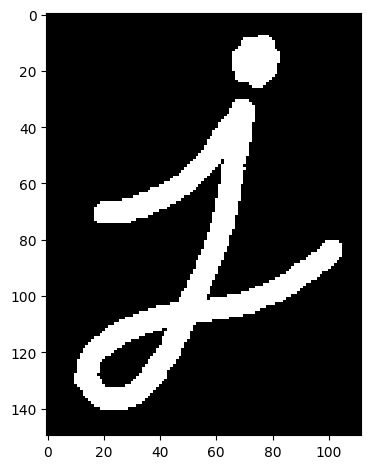

In [3]:
import cv2
import skimage.io as io

# Load the image
image_path = "fichiers_cours/j.png"
image = io.imread(image_path)
#convertir l'image en niveaux de gris
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
io.imshow(image)
io.show()

### 10-2-1-1 Erosion

Un élément structurant est une petite forme géométrique, telle qu'un carré ,utilisé dans les opérations morphologiques sur les images, ici un disque de rayon 2 pixels. Il agit comme un motif pour définir le comportement de l'opération morphologique, comme l'érosion ou la dilatation. L'élément structurant "balaye" l'image pixel par pixel, déterminant comment les pixels voisins influencent le résultat de l'opération.

L'erosion va globalement afiner les traits, elle peut être utilisés spécifiquement pour la suppression de bruit ou pour la séparation d'objets connectés sur une image.

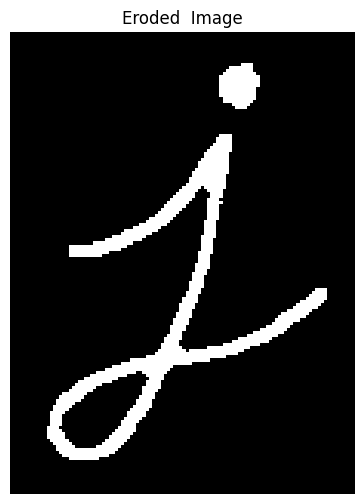

In [9]:
from skimage.morphology import erosion, disk
import matplotlib.pyplot as plt

footprint = disk(2)  # Element structurant
eroded_image = erosion(image, footprint)


plt.figure(figsize=(6, 6))
plt.imshow(eroded_image, cmap=plt.cm.gray)
plt.title('Eroded  Image')
plt.axis('off')
plt.show()

### 10-2-2 Dilatation

La dilatation va globalement épaissir les traits, elle peut ête utilisé en préparation de la detection de contours ou pour boucher des trous dans un objet.

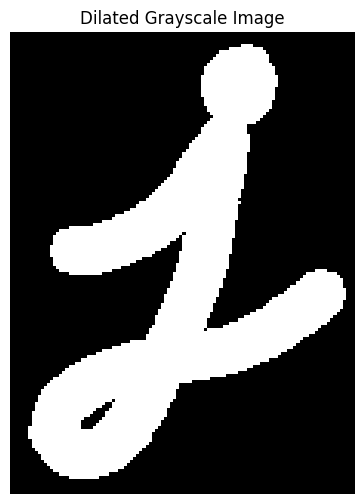

In [10]:
from skimage.morphology import dilation

# Apply dilation with a disk-shaped structuring element
footprint_dilation = disk(6)  # You can adjust the size of the disk
dilated_image = dilation(eroded_image, footprint_dilation)

# Display the dilated image
plt.figure(figsize=(6, 6))
plt.imshow(dilated_image, cmap=plt.cm.gray)
plt.title('Dilated Grayscale Image')
plt.axis('off')
plt.show()


### 10-2-3 Algorithme Watershed

L'algorithme Watershed (littéralement "bassin versant" en anglais) est utilisé pour la segmentation, c'est-à-dire la partition d'une image en régions ou objets distincts. Son nom est inspiré par l'analogie avec les bassins versants dans la topographie, où l'eau de pluie s'écoule naturellement vers les points bas formant des bassins.  


- L'algorithme considère l'image comme un relief topographique où les niveaux de gris représentent l'altitude.
- Les régions de l'image où l'intensité des niveaux de gris est élevée sont analogues à des pics de montagnes, et les points bas correspondent à des vallées.
- On simule un remplissage d'eau à partir de ces points bas. L'eau commence à remplir les bassins versants jusqu'à ce que des bassins distincts se rejoignent.
- Les lignes où l'eau se rejoint forment des lignes de partage des eaux, qui servent de frontières pour la segmentation.

Utilisons l'exemple fourni dans la [documentation de Scikit Image](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html) pour l'illustration:

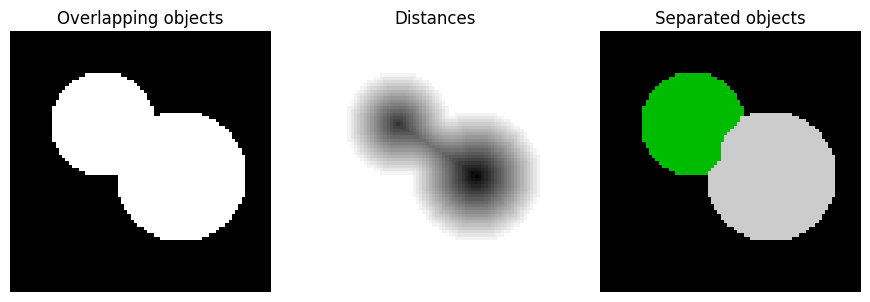

In [11]:
# Overlapping objects, Distances, Separated objects

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


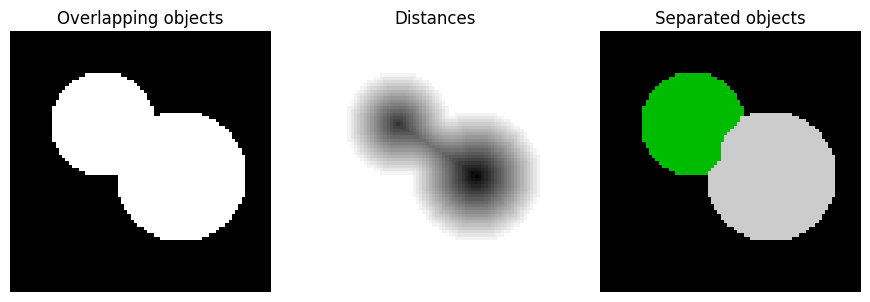

In [20]:
# Overlapping objects, Distances, Separated objects

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2  # Create mask for the first circle
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2  # Create mask for the second circle
image = np.logical_or(mask_circle1, mask_circle2)  # Combine the two masks

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)  # Calculate distance transform
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image, min_distance=1) # Find local maxima
mask = np.zeros(distance.shape, dtype=bool)  # Create an empty mask
mask[tuple(coords.T)] = True  # Set the pixels at the local maxima positions to True in the mask
markers, _ = ndi.label(mask)  # Label the markers
labels = watershed(-distance, markers, mask=image)  # Apply watershed algorithm

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


L'image de distances permet de visualiser la distance de chaque pixel au pixel de fond le plus proche. Les pics dans la transformation de distance sont des marqueurs potentiels qui peuvent être utilisés dans la segmentation watershed

Séance 1 : Introduction au Traitement d'Images avec Python (1 heure)

- Partie 1 : Introduction au Traitement d'Images (20 minutes)
        Présentation de l'importance du traitement d'images en physique et dans d'autres domaines.
        Aperçu des applications du traitement d'images.

- Partie 2 : Bibliothèques de Traitement d'Images en Python (20 minutes)
        Brève introduction aux principales bibliothèques de traitement d'images : OpenCV, scikit-image, Pillow (PIL).
        Discussion des spécificités de chaque bibliothèque.

- Partie 3 : Chargement et Affichage d'Images (20 minutes)
        Utilisation de Pillow (PIL) pour charger et afficher une image en Python.
        Exemple pratique : Chargement et affichage d'une image.

Séance 2 : Manipulation d'Images et Opérations de Base (1 heure)

- Partie 4 : Manipulation de Pixels (20 minutes)
        Accès et modification des pixels d'une image.
        Exemple pratique : Modification de pixels pour créer des effets simples.

- Partie 5 : Conversion de Formats d'Image (20 minutes)
        Conversion entre différents formats d'image (PNG, JPEG, TIFF, etc.) en utilisant Pillow (PIL).
        Exemple pratique : Conversion d'une image d'un format à un autre.

- Partie 6 : Exercices Pratiques (20 minutes)
        Les étudiants travaillent sur des exercices pratiques pour mettre en pratique les concepts abordés jusqu'à présent.

Séance 3 : Opérations Avancées en Traitement d'Images (1 heure)

- Partie 7 : Filtres et Effets d'Images (20 minutes)
        Introduction aux filtres d'images pour améliorer ou modifier des images.
        Exemple pratique : Application de filtres de flou et de renforcement des bords.

- Partie 8 : Histogrammes d'Images (20 minutes)
        Calcul et tracé d'histogrammes d'images en Python.
        Exemple pratique : Tracé de l'histogramme d'une image et analyse.

- Partie 9 : Exercices Pratiques Avancés (20 minutes)
        Les étudiants travaillent sur des exercices avancés pour explorer davantage le traitement d'images.Séance 1 : Introduction au Traitement d'Images avec Python (1 heure)

   